In [390]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
np.set_printoptions(precision=4, suppress=True)
quiver_args = dict(angles='xy', scale_units='xy', scale=1)

In [391]:
def plt_basics(xlim=None, ylim=None, figsize=None, set_aspect=True, tick=None):
  if figsize:
    plt.figure(figsize=figsize)

  if set_aspect:
    plt.gca().set_aspect('equal', adjustable='box')

  plt.axhline(0, color='black', linewidth=0.5)
  plt.axvline(0, color='black', linewidth=0.5)
  plt.grid(True)

  if xlim:
    plt.xlim(xlim)
  if ylim:
    plt.ylim(ylim)

  if tick:
    ax = plt.gca()
    ax.xaxis.set_major_locator(MultipleLocator(tick))
    ax.yaxis.set_major_locator(MultipleLocator(tick))

In [392]:
def plt_vector(tail, head):
  plt.quiver(*tail, *head, **quiver_args)


def plt_line(start, end, style='g--', alpha=0.5):
  plt.plot([start[0], end[0]], [start[1], end[1]], style, alpha=alpha)

In [393]:
X = np.array([
    [1, 2.2],
    [2, 5],
    [3, 6.6],
    [4, 9],
    [5, 9.5],
]).T

X

array([[1. , 2. , 3. , 4. , 5. ],
       [2.2, 5. , 6.6, 9. , 9.5]])

In [394]:
X[0]  # coefficients for i vector
X[1]  # coefficients for j vector

array([1., 2., 3., 4., 5.])

array([2.2, 5. , 6.6, 9. , 9.5])

In [395]:
# w1 = np.array([1, 0])  # standard i vector
# w2 = np.array([0, 1])  # standard j vector

w1 = np.array([1, 0.5])
w2 = np.array([-w1[1], w1[0]])  # orthogonal to w1

In [396]:
w1 = w1 / np.linalg.norm(w1)  # normalizing (converting to unit vector)
w2 = w2 / np.linalg.norm(w2)

w1
w2

array([0.8944, 0.4472])

array([-0.4472,  0.8944])

In [397]:
X.T.shape, w1.shape

c1 = X.T @ w1
c2 = X.T @ w2

c1  # coefficients for w1 vector
c2  # coefficients for w2 vector

((5, 2), (2,))

array([1.8783, 4.0249, 5.6349, 7.6026, 8.7207])

array([1.5205, 3.5777, 4.5616, 6.261 , 6.261 ])

In [398]:
w1.shape, c1.shape
w1.reshape(-1, 1).shape, c1.reshape(1, -1).shape

((2,), (5,))

((2, 1), (1, 5))

In [399]:
proxies_w1 = w1.reshape(-1, 1) @ c1.reshape(-1, 1).T  # yellow dots on w1
proxies_w2 = w2.reshape(-1, 1) @ c2.reshape(-1, 1).T  # yellow dots on w2

proxies_w1
proxies_w2

array([[1.68, 3.6 , 5.04, 6.8 , 7.8 ],
       [0.84, 1.8 , 2.52, 3.4 , 3.9 ]])

array([[-0.68, -1.6 , -2.04, -2.8 , -2.8 ],
       [ 1.36,  3.2 ,  4.08,  5.6 ,  5.6 ]])

In [400]:
X_new = proxies_w1 + proxies_w2

X
X_new
np.mean((X - X_new) ** 2)  # loss (mean squared error)

array([[1. , 2. , 3. , 4. , 5. ],
       [2.2, 5. , 6.6, 9. , 9.5]])

array([[1. , 2. , 3. , 4. , 5. ],
       [2.2, 5. , 6.6, 9. , 9.5]])

np.float64(2.761013168273541e-31)

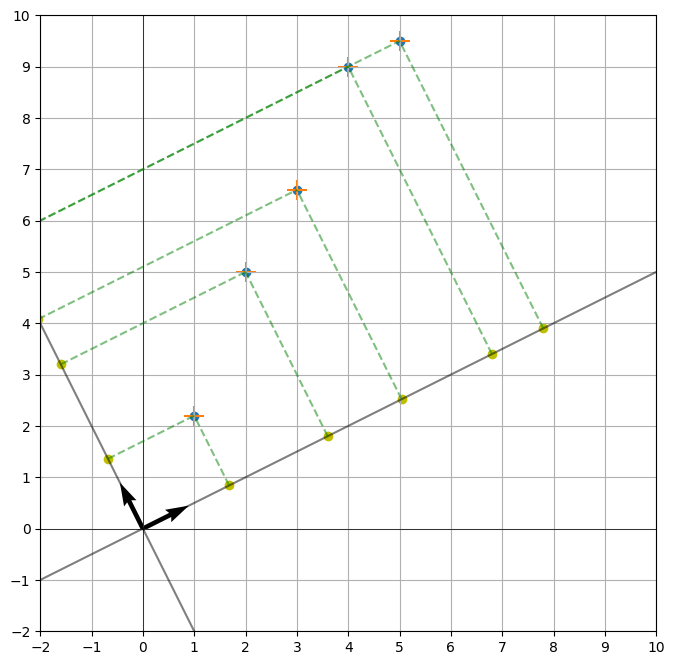

In [401]:
plt_basics(xlim=(-2, 10), ylim=(-2, 10), tick=1, figsize=(8, 8))

_ = plt.scatter(*X)
_ = plt.scatter(*X_new, marker='+', s=200)
_ = plt.scatter(*proxies_w1, color='y')
_ = plt.scatter(*proxies_w2, color='y')

plt_vector((0, 0), w1)
plt_vector((0, 0), w2)
_ = plt_line(w1*-20, w1*20, style='k-')
_ = plt_line(w2*-20, w2*20, style='k-')

for i, x in enumerate(X.T):
  plt_line(proxies_w1[:, i], x)
  plt_line(proxies_w2[:, i], x)

# rotate w1, w2 to align with universe coordinates

In [402]:
w1_rotated = np.array([1, 0])
w2_rotated = np.array([0, 1])
proxies_w1_rotated = w1_rotated.reshape(-1, 1) @ c1.reshape(-1, 1).T  # yellow dots on w1_rotated
proxies_w2_rotated = w2_rotated.reshape(-1, 1) @ c2.reshape(-1, 1).T  # yellow dots on w2_rotated
X_rotated = proxies_w1_rotated + proxies_w2_rotated

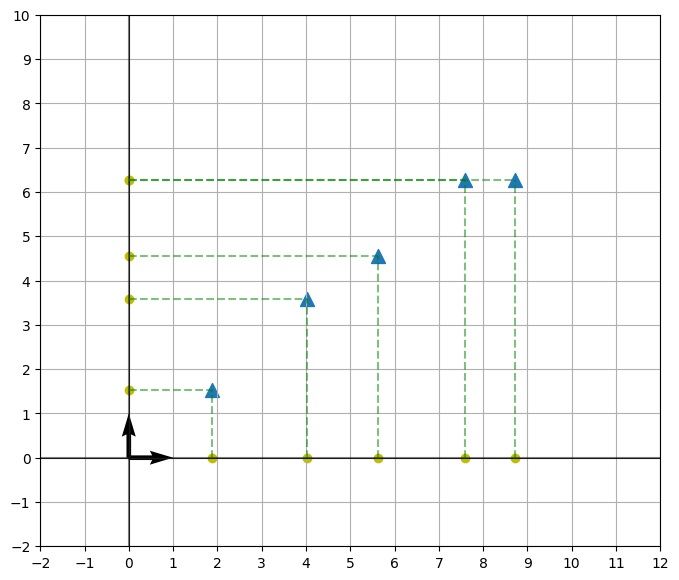

In [403]:
plt_basics(xlim=(-2, 12), ylim=(-2, 10), tick=1, figsize=(8, 8))

plt_vector((0, 0), w1_rotated)
plt_vector((0, 0), w2_rotated)
_ = plt_line(w1_rotated*-20, w1_rotated*20, style='k-')
_ = plt_line(w2_rotated*-20, w2_rotated*20, style='k-')

_ = plt.scatter(*X_rotated, marker='^', s=100)
_ = plt.scatter(c1, [0]*len(c1), color='y')
_ = plt.scatter([0]*len(c2), c2, color='y')

for i, x in enumerate(X_rotated.T):
  plt_line(proxies_w1_rotated[:, i], x)
  plt_line(proxies_w2_rotated[:, i], x)

# dimensionality reduction using PCA

In [404]:
X  # original data

array([[1. , 2. , 3. , 4. , 5. ],
       [2.2, 5. , 6.6, 9. , 9.5]])

In [405]:
c1, c2  # store coefficients
w1, w2  # with basis vectors

(array([1.8783, 4.0249, 5.6349, 7.6026, 8.7207]),
 array([1.5205, 3.5777, 4.5616, 6.261 , 6.261 ]))

(array([0.8944, 0.4472]), array([-0.4472,  0.8944]))

In [406]:
# reconstruct original data using stored (c1, c2) and (w1, w2)
proxies_w1_reconstruct = w1.reshape(-1, 1) @ c1.reshape(-1, 1).T  # yellow dots on w1
proxies_w2_reconstruct = w2.reshape(-1, 1) @ c2.reshape(-1, 1).T  # yellow dots on w2

X_reconstructed = proxies_w1_reconstruct

X
X_reconstructed
np.mean((X - X_reconstructed)**2)  # loss (mean squred error)

array([[1. , 2. , 3. , 4. , 5. ],
       [2.2, 5. , 6.6, 9. , 9.5]])

array([[1.68, 3.6 , 5.04, 6.8 , 7.8 ],
       [0.84, 1.8 , 2.52, 3.4 , 3.9 ]])

np.float64(11.431999999999999)

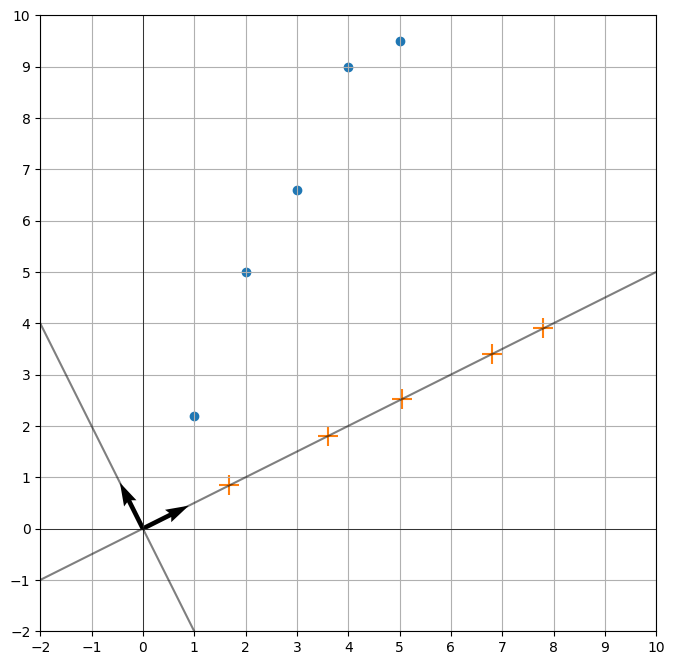

In [407]:
plt_basics(xlim=(-2, 10), ylim=(-2, 10), tick=1, figsize=(8, 8))

_ = plt.scatter(*X)
_ = plt.scatter(*X_reconstructed, marker='+', s=200)

plt_vector((0, 0), w1)
plt_vector((0, 0), w2)
_ = plt_line(w1*-20, w1*20, style='k-')
_ = plt_line(w2*-20, w2*20, style='k-')

# how many (k) of c1, c2, c3, ... you need?

select as many to capture at least 95% variance

In [408]:
np.var(c1)
np.var(c2)

np.float64(6.015679999999998)

np.float64(3.1827199999999993)

In [409]:
total_variance = np.var(c1) + np.var(c2)
np.var(c1) / total_variance
np.var(c2) / total_variance

np.float64(0.6539919986084536)

np.float64(0.34600800139154636)